In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
from pandas.plotting import table
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import seaborn as sns
import six
from scipy.stats import chisquare

In [2]:
df_furtos = pd.read_csv('D:\\EPS\\TCC\\data_cleaned\\SSP\\furtos_2018.csv', sep=",", decimal=".")

D:\Programas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_furtos.drop(df_furtos[(df_furtos.PERIDOOCORRENCIA == 'EM HORA INCERTA')].index, inplace=True)

In [4]:
df_furtos.rename({'PERIDOOCORRENCIA': 'PERIODO_OCORRENCIA'}, axis=1, inplace=True)

In [5]:
furtos_2018_grp = df_furtos.groupby(['PERIODO_OCORRENCIA', 'DATAOCORRENCIA'])['PERIODO_OCORRENCIA'].count().rename('TOTAL').reset_index()

In [6]:
furtos_2018_grp

,PERIODO_OCORRENCIA,DATAOCORRENCIA,TOTAL
0,A NOITE,2018-01-01,6
1,A NOITE,2018-01-02,45
2,A NOITE,2018-01-03,35
3,A NOITE,2018-01-04,28
4,A NOITE,2018-01-05,30
...,...,...,...
1455,PELA MANHÃ,2018-12-27,18
1456,PELA MANHÃ,2018-12-28,7
1457,PELA MANHÃ,2018-12-29,15
1458,PELA MANHÃ,2018-12-30,19


In [8]:
df1 = furtos_2018_grp.groupby(['PERIODO_OCORRENCIA'])['TOTAL'].sum().rename('TOTAL').reset_index()

In [9]:
df1

,PERIODO_OCORRENCIA,TOTAL
0,A NOITE,13018
1,A TARDE,13181
2,DE MADRUGADA,6766
3,PELA MANHÃ,16147


In [10]:
df2 = furtos_2018_grp.groupby(['PERIODO_OCORRENCIA'])['PERIODO_OCORRENCIA'].count().rename('QTD').reset_index()

In [11]:
df2

,PERIODO_OCORRENCIA,QTD
0,A NOITE,365
1,A TARDE,365
2,DE MADRUGADA,365
3,PELA MANHÃ,365


In [12]:
df3 = df1.merge(df2, how='left', on=['PERIODO_OCORRENCIA'])

In [13]:
df3

,PERIODO_OCORRENCIA,TOTAL,QTD
0,A NOITE,13018,365
1,A TARDE,13181,365
2,DE MADRUGADA,6766,365
3,PELA MANHÃ,16147,365


In [14]:
df3['LAMBDA'] = df3['TOTAL']/df3['QTD']

In [15]:
df3

,PERIODO_OCORRENCIA,TOTAL,QTD,LAMBDA
0,A NOITE,13018,365,35.665753
1,A TARDE,13181,365,36.112329
2,DE MADRUGADA,6766,365,18.536986
3,PELA MANHÃ,16147,365,44.238356


In [16]:
x = []
x=np.array(x)

for index, item in df3.iterrows():
    np.random.seed(42)
    y = np.random.poisson(item['LAMBDA'], item['QTD'])
    x = np.concatenate((x, y))

In [17]:
x

array([33., 40., 29., ..., 43., 51., 39.])

In [18]:
x.size

1460

In [20]:
furtos_2018_grp['expected_value'] = x.tolist()

In [21]:
furtos_2018_grp

,PERIODO_OCORRENCIA,DATAOCORRENCIA,TOTAL,expected_value
0,A NOITE,2018-01-01,6,33.0
1,A NOITE,2018-01-02,45,40.0
2,A NOITE,2018-01-03,35,29.0
3,A NOITE,2018-01-04,28,37.0
4,A NOITE,2018-01-05,30,42.0
...,...,...,...,...
1455,PELA MANHÃ,2018-12-27,18,38.0
1456,PELA MANHÃ,2018-12-28,7,37.0
1457,PELA MANHÃ,2018-12-29,15,43.0
1458,PELA MANHÃ,2018-12-30,19,51.0


In [24]:
for index, item in df3.iterrows():
    print(furtos_2018_grp.loc[furtos_2018_grp['PERIODO_OCORRENCIA'] == item['PERIODO_OCORRENCIA']])

    PERIODO_OCORRENCIA DATAOCORRENCIA  TOTAL  expected_value
0              A NOITE     2018-01-01      6            33.0
1              A NOITE     2018-01-02     45            40.0
2              A NOITE     2018-01-03     35            29.0
3              A NOITE     2018-01-04     28            37.0
4              A NOITE     2018-01-05     30            42.0
..                 ...            ...    ...             ...
360            A NOITE     2018-12-27     21            30.0
361            A NOITE     2018-12-28     20            29.0
362            A NOITE     2018-12-29     24            34.0
363            A NOITE     2018-12-30     17            42.0
364            A NOITE     2018-12-31     10            31.0

[365 rows x 4 columns]
    PERIODO_OCORRENCIA DATAOCORRENCIA  TOTAL  expected_value
365            A TARDE     2018-01-01     30            34.0
366            A TARDE     2018-01-02     35            40.0
367            A TARDE     2018-01-03     42            29.0


In [25]:
chi_square = []

p_value = []

for index, item in df3.iterrows():
    df_per_day = furtos_2018_grp.loc[furtos_2018_grp['PERIODO_OCORRENCIA'] == item['PERIODO_OCORRENCIA']]
    
    chi_square.append(chisquare(f_obs = df_per_day['TOTAL'], f_exp = df_per_day['expected_value'])[0])
    p_value.append(chisquare(f_obs = df_per_day['TOTAL'], f_exp = df_per_day['expected_value'])[1])

In [26]:
chi_square = np.array(chi_square)
p_value = np.array(p_value)

In [27]:
chi_square

array([2222.96457744, 2512.10461552, 1510.45634853, 3732.53821439])

In [28]:
p_value

array([1.30073885e-263, 0.00000000e+000, 3.15376220e-139, 0.00000000e+000])

In [29]:
df3['chi_square'] = chi_square.tolist()
df3['p_value'] = p_value.tolist()

In [30]:
df3

,PERIODO_OCORRENCIA,TOTAL,QTD,LAMBDA,chi_square,p_value
0,A NOITE,13018,365,35.665753,2222.964577,1.300739e-263
1,A TARDE,13181,365,36.112329,2512.104616,0.000000e+00
2,DE MADRUGADA,6766,365,18.536986,1510.456349,3.153762e-139
3,PELA MANHÃ,16147,365,44.238356,3732.538214,0.000000e+00


In [31]:
cats = ['DE MADRUGADA', 'PELA MANHÃ', 'A TARDE', 'A NOITE']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df3['PERIODO_OCORRENCIA'] = df3['PERIODO_OCORRENCIA'].astype(cat_type)
df3.sort_values("PERIODO_OCORRENCIA", inplace=True)
df3

,PERIODO_OCORRENCIA,TOTAL,QTD,LAMBDA,chi_square,p_value
2,DE MADRUGADA,6766,365,18.536986,1510.456349,3.153762e-139
3,PELA MANHÃ,16147,365,44.238356,3732.538214,0.000000e+00
1,A TARDE,13181,365,36.112329,2512.104616,0.000000e+00
0,A NOITE,13018,365,35.665753,2222.964577,1.300739e-263


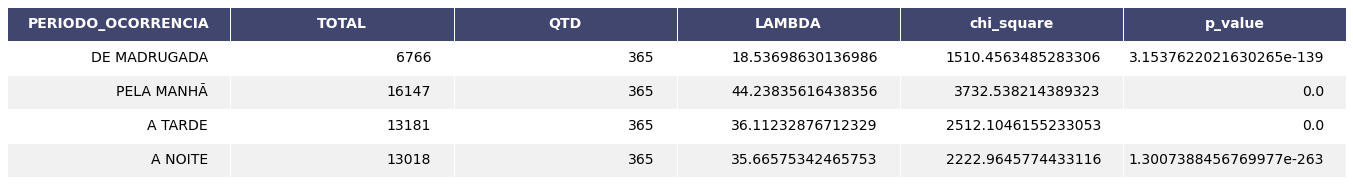

In [32]:
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    fig.savefig('qui-quadrado_resultados_furtos_2018_periodo_dia.png')
    
    return ax

render_mpl_table(df3, header_columns=0, col_width=4.0)